In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of this dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

1. First, load the dataset from the weatherinszeged table from Thinkful's database.
2. Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. 
3. Estimate the model using OLS.
4. Now, check if your model meets the Gauss-Markov Conditions above. 
5. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Here are the credentials you can use to connect to the database:

 - postgres_user = 'dsbc_student'
 - postgres_pw = '7*.8G9QH21'
 - postgres_host = '142.93.121.174'
 - postgres_port = '5432'
 - postgres_db = 'weatherinszeged'

As in earlier assignments, be sure to close the database connection after initially pulling in your data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings(action='ignore')

### 1. First, load the dataset from the weatherinszeged table from Thinkful's database.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged', con=engine)
engine.dispose()

In [3]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [5]:
weather_df.describe(include='all')

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
count,96453,96453,96453,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 19:00:00+00:00,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
first,2005-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-12-31 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN


In [6]:
weather_df.nunique()

date                   96429
summary                   27
preciptype                 3
temperature             7574
apparenttemperature     8984
humidity                  90
windspeed               2484
windbearing              360
visibility               949
loudcover                  1
pressure                4979
dailysummary             214
dtype: int64

### 2. Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. 

In [7]:
weather_selc = weather_df[['temperature', 'humidity', 'windspeed', 'windbearing', 'pressure']]
weather_selc.head()

,temperature,humidity,windspeed,windbearing,pressure
0,9.472222,0.89,14.1197,251.0,1015.13
1,9.355556,0.86,14.2646,259.0,1015.63
2,9.377778,0.89,3.9284,204.0,1015.94
3,8.288889,0.83,14.1036,269.0,1016.41
4,8.755556,0.83,11.0446,259.0,1016.51


### 3. Estimate the model using OLS.

In [8]:
from sklearn import linear_model

Y = weather_selc['temperature']
X = weather_selc[['humidity', 'windspeed', 'windbearing', 'pressure']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('\nCefficient : \n', lrm.coef_)
print('\nIntercept : \n', lrm.intercept_)


Cefficient : 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept : 
 37.92643818528537


`LinearRegression()`'s `fit()` method runs the OLS algorithm by default. Since we get the parameters using OLS, we can write our estimated model:

$$ temperature = 37.93 + -32.5humidity - 0.2windspeed, 0.004windbearing - 0.0007pressure$$  


Now, we run the same model, this time using statsmodels.

In [9]:
import statsmodels.api as sm

X2 = sm.add_constant(X)

results = sm.OLS(Y, X2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:49:28   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4. Now, check if your model meets the Gauss-Markov Conditions above. 

**Assumption one: linearity of the model in its coefficients** 

**Assumption two: the error term should be zero on average**

In [10]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors)))

Mean of the errors in the temperature model is: -1.9624955657832385e-15


**Assumption three: homoscedasticity**

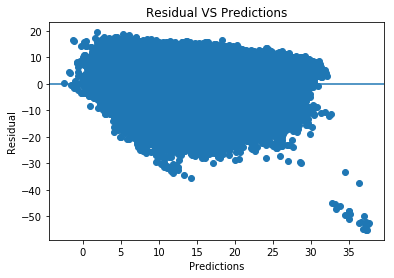

In [11]:
plt.scatter(predictions, errors)
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual VS Predictions')
plt.show()

Above graph implies that our model error terms aren't slightly homoscedastic. We need to dive into the reason of right-down side of graph data.  
Here are some formal statistical tests: Bartlett, Levne

In [12]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print('Bartlett test statistic value is {0:3g} and p-value is {1:3g}'.format(bart_stats[0], bart_stats[1]))
print('Levene test statistic value is {0:3g} and p-value is {1:3g}'.format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p-value is   0
Levene test statistic value is 2321.24 and p-value is   0


The p-values of Bartlett and Levene test is 0. It means that the result rejects the null hypothesis which means our errors are heteroscedastic.

**Assumption four: low multicollinearity**

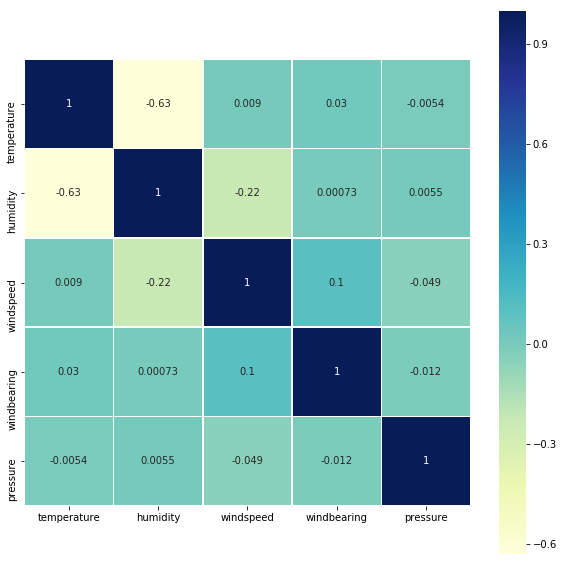

In [13]:
import seaborn as sns

weather_corr = weather_selc.corr()
plt.figure(figsize=(10,10))
sns.heatmap(weather_corr, square=True, annot=True, linewidths=0.5, cmap='YlGnBu')

I think the 'windspeed' and 'humidity' features are quite related. So let's do PCA for those variables.

In [14]:
X = weather_selc[['humidity', 'windspeed']]

In [15]:
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(X)

In [16]:
x_std

array([[ 0.79347043,  0.47863499],
       [ 0.63999555,  0.49959388],
       [ 0.79347043, -0.99547337],
       ...,
       [-0.89475327, -0.2642411 ],
       [-0.6901201 , -0.04067964],
       [-0.6389618 , -0.71369278]])

In [17]:
features = x_std.T
cov_matrix = np.cov(features)

print(cov_matrix)

[[ 1.00001037 -0.22495379]
 [-0.22495379  1.00001037]]


In [18]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [19]:
eig_val

array([1.22496416, 0.77505658])

In [20]:
eig_vec

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [21]:
eig_val[0] / sum(eig_val)

0.6124757279398914

The first eigen value could project 61.24% values of all the values.

In [22]:
projected_X = x_std.dot(eig_vec.T[0])

In [23]:
wind_humi = projected_X

In [24]:
weather_selc['wind_humi'] = pd.DataFrame(wind_humi)

In [25]:
weather_selc2 = weather_selc.drop(['humidity', 'windspeed'], axis = 1)

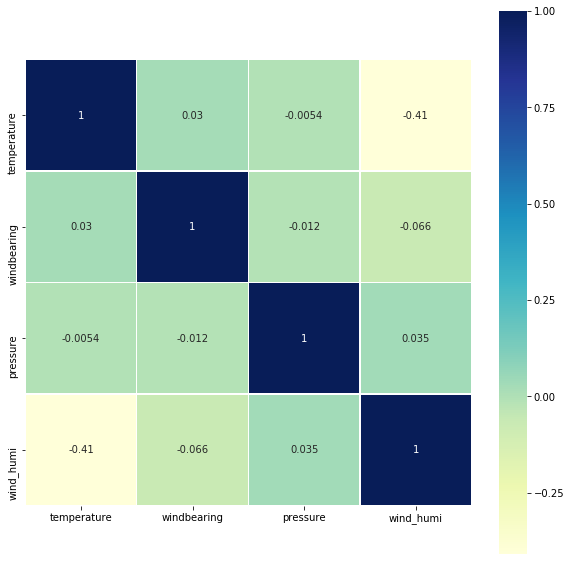

In [26]:
weather_selc2_corr = weather_selc2.corr()

plt.figure(figsize=(10,10))
sns.heatmap(weather_selc2_corr, linewidths = 0.5, square=True, annot=True, cmap='YlGnBu')

Voila! windspeed and humidity combination variable makes breakthrough as to the correlation coefficient value.

**Assumption five: error terms should be uncorrelated with one another**

In [27]:
Y3 = weather_selc2['temperature']
X3 = weather_selc2[['wind_humi', 'windbearing', 'pressure']]

lrm3 = linear_model.LinearRegression()
lrm3.fit(X3, Y3)

print('\nCefficient : \n', lrm3.coef_)
print('\nIntercept : \n', lrm3.intercept_)


Cefficient : 
 [-3.53632815e+00  2.76106921e-04  7.27890346e-04]

Intercept : 
 11.150660073826419


In [28]:
predictions3 = lrm3.predict(X3)
errors3 = Y3 - predictions3

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors3)))

Mean of the errors in the temperature model is: -2.1609735567033395e-15


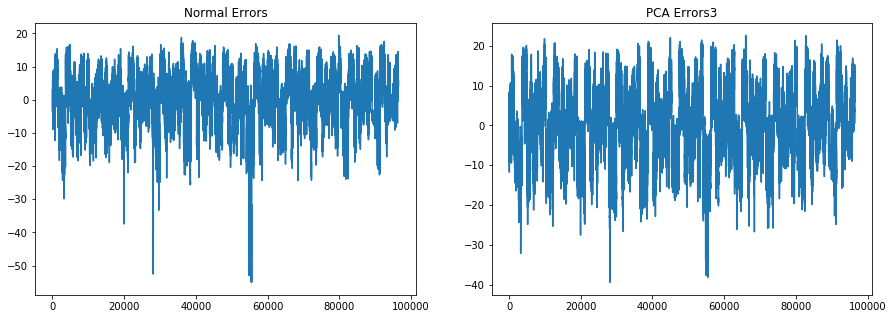

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(errors)
plt.title('Normal Errors')

plt.subplot(1,2,2)
plt.plot(errors3)
plt.title('PCA Errors3')
plt.show()

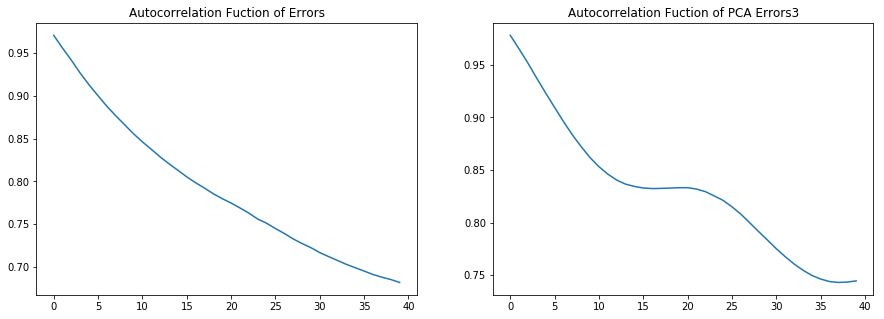

In [30]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)
acf_data3 = acf(errors3)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(acf_data[1:])
plt.title('Autocorrelation Fuction of Errors')

plt.subplot(1,2,2)
plt.plot(acf_data3[1:])
plt.title('Autocorrelation Fuction of PCA Errors3')

plt.show()

So, the autocorrelation between the errors of our temperature models are indeed very low (ranging between 0.95 and 0.7).

**Assumption six: features shouldn't be correlated with the error**  


**<font color=red>A very important remark on the normality of the errors</font>**  
First of all, I am going to show some graphs (QQ plots and Histogram) to present the errors visually and then I am going to calculate Jarque-bera and Normal test.

In [31]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats1 = jarque_bera(errors)
norm_stats1 = normaltest(errors)

jb_stats3 = jarque_bera(errors3)
norm_stats3 = normaltest(errors3)

print('Jarque-Bera test stastistics of error1 is {0} and p value is {1}'.format(jb_stats1[0], jb_stats1[1]))
print('Normality test statistics of error1 is {0} and p value is {1}'.format(norm_stats1[0], norm_stats1[1]))
print()
print('Jarque-Bera test stastistics of error13 is {0} and p value is {1}'.format(jb_stats3[0], jb_stats3[1]))
print('Normality test statistics of error13 is {0} and p value is {1}'.format(norm_stats3[0], norm_stats3[1]))

Jarque-Bera test stastistics of error1 is 3793.296735252356 and p value is 0.0
Normality test statistics of error1 is 3375.4323076995797 and p value is 0.0

Jarque-Bera test stastistics of error13 is 1807.8641883885282 and p value is 0.0
Normality test statistics of error13 is 3543.0584815404886 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.

### 5. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model. ###